# <p style="text-align:center">Travail personel 3: Équations différentielles</p> #

**Mathieu Dumais**, **Antoine Rousseau** et **Gabriel Lapointe**.

Présenté à **Philippe Després**.

Date: **19 mars 2021**.


# Partie 1: Comètes
### a.

\begin{equation}
	\Rightarrow x = v_x
\end{equation}

\begin{equation}
	\Rightarrow y = v_y
\end{equation}

\begin{equation}
	\Rightarrow v_x = \frac{-GMx}{r^3}
\end{equation}

\begin{equation}
	\Rightarrow v_y = \frac{-GMy}{r^3}
\end{equation}

### b.

In [1]:
from astropy.constants import G, M_sun, M_earth #(m3 / (kg s2) and kg)
from numpy import array, sqrt, arange, empty, transpose
import matplotlib.pyplot as plt
from astropy.time import Time # ephemerides
import de421
from jplephem import Ephemeris

In [2]:
#function that calculates square root of a sum of squares. Used for radius calculation   
def r_func(x,y):
    return sqrt(x**2 + y**2)

def f(r,t):
    x = r[0]
    y = r[1]
    v_x = r[2]
    v_y= r[3]
    radius = r_func(x,y)
    fx = v_x
    fv_x = -GM*x/radius**3
    fy = v_y
    fv_y = -GM*y/radius**3
    
    return array([fx, fy, fv_x, fv_y], float)

#function that allows to add calculated values into 4 arrays representing the position and velocity of comet in 2D
def append_all(r):
    x_points.append(r[0])
    y_points.append(r[1])
    vx_points.append(r[2])
    vy_points.append(r[3])

In [3]:
x_points = []
y_points = []
vx_points = []
vy_points = []

GM = G.value*M_sun.value #Gravitational constant * Mass of sun

#Initial conditions. Corresponds to intial position and initial speed of comet
x_0 = 4e12 #m
y_0 = 0 #m
vx_0 = 0 #m/s
vy_0 = 500 #m/s

r = array([x_0, y_0, vx_0, vy_0], float)    

a = 0 #Initial time (s)
b = 31536000*100 #Final time (s). corresponds to 100 years in seconds.
N = b/31530 #Number of steps
h = (b-a)/N #Size of each step
tpoints = arange(a,b,h)

C:\Users\14182\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


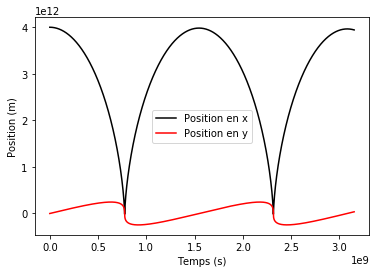

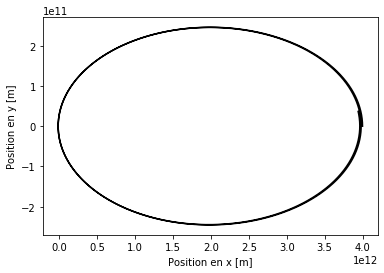

In [4]:
#Loop calculating comet position and velocity for each iteration. 
for t in tpoints:
    append_all(r)
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h) 
    r += (k1+2*k2+2*k3+k4)/6 

#Plotting comet position in space (in plane xy)
plt.plot(tpoints, x_points, color = "k", label = "Position en x")
plt.plot(tpoints, y_points, color = "r", label = "Position en y")
plt.xlabel("Temps (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

#Plotting comet position in space (in plane xy)
plt.plot(x_points, y_points, "k")
plt.xlabel("Position en x [m]")
plt.ylabel("Position en y [m]")
plt.show()

On constate que 2 orbites apparaissent dans les figures et que les deux orbites sont superposées. Un pas trop petit ne faisait pas apparaitre les orbites. Pour remédier à la situation, le nombre de steps optimal en fonction du temps initial et du temps final a été obtenu. En définissant le nombre de steps à partir du temps, on obtient toujours un pas suffisamment petit sans avoir à inspecter les figures et trouver le pas par essai et erreur.

### c.

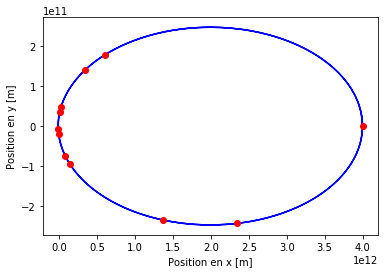

In [5]:
#Fonction qui permet d'effectuer la racine d'une somme de carrés
def r_func(x, y):
    return sqrt(x ** 2 + y ** 2)

#Fonction représentant les 4 équations différentiels de notre problème
def f(r):
    x = r[0]
    y = r[1]
    v_x = r[2]
    v_y = r[3]
    radius = r_func(x, y)
    fx = v_x
    fv_x = -GM * x / radius ** 3
    fy = v_y
    fv_y = -GM * y / radius ** 3

    return array([fx, fy, fv_x, fv_y])

GM = G.value * M_sun.value
x_0 = 4e12  # m
y_0 = 0  # m
vx_0 = 0  # m/s
vy_0 = 500  # m/s
r = array([x_0, y_0, vx_0, vy_0], float)

# Fonction qui effectue un itération de la m;thode Runge-Kutta 4em ordre
def RK_step(r, h):
    k1 = h * f(r)
    k2 = h * f(r + 0.5*k1)
    k3 = h * f(r + 0.5*k2)
    k4 = h * f(r + k3)
    return (k1 + 2*k2 + 2*k3 + k4)/6

# Fonction qui permet d'évaluer l'erreur, de trouver le pas optimal, de trouver la position de la comete, ainsi que le temps associé
def time_step(r, t, h):

    # Opère 2 itérations de longueur h de la fonction Runge-Kutta afin d'obtenir un estimé de la valeur à t+2h
    r_1_1 = RK_step(r, h)
    r_1_2 = RK_step(r + r_1_1, h)
    r_1 = r_1_1 + r_1_2

    # Opère 1 itération de longueur 2h de la fonction Runge-Kutta afin d'obtenir un estimé de la valeur à t+2h
    r_2 = RK_step(r, 2 * h)

    x_1 = r_1[0]
    x_2 = r_2[0]
    y_1 = r_1[1]
    y_2 = r_2[1]

    #calcul de rho, le ratio entre l'erreur voulue et calculée
    rho = h*delta / ((r_func((x_1 - x_2), (y_1 - y_2)))/30)

    # permet d'ajuster h (le pas) et de mettre à jour t (le temps)
    if rho >= 1:
        t = t + 2*h
        if rho**(1/4) > 2:
            h *= 2
        else:
            h *= rho**(1/4)

        return r_1, h, t

    else:
        return time_step(r, t, h*(rho**(1/4)))

a = 0 # Temps initial [s]
b = 100*31536000  # Temps final [s] (100 ans)
delta = 1000/(31536000) #Valeur de la target en m/s
h = b/150000  # step size initial

#Création des lsites contenant la position de la comete ainsi que le temps assosié à chaque itération
tpoints = []
xpoints = []
ypoints = []

t = a # On défini que le t initial est a

# Calcul de la position et de la vitesse de la comete à chaque itération jusqu'à atteindre le temps désiré
while t < b:
    tpoints.append(t)
    xpoints.append(r[0])
    ypoints.append(r[1])
    delta_r, h, t = time_step(r, t, h)
    r += delta_r

# Création du graphique
plt.plot(array(xpoints), array(ypoints), 'b')
plt.plot(array(xpoints)[::100], array(ypoints)[::100], 'ro')
plt.xlabel('Position en x [m]')
plt.ylabel('Position en y [m]')
plt.show()

Ce code permet de calculer une erreur approximée sur la valeur à t + 2h. À partir de cette erreur et d'une erreur "target", un pas idéal est calculé et utilisé pour la prochaine itération. En répétant cette opération pour un intervalle de temps donné, la position de la comète est calculée sur l'intervalle en effectuant des pas de grandeur idéal pour respecter l'erreur désirée tout en exécutant l'algorithme à une vitesse beaucoup plus élevée.

# Partie 2: La Terre
### d.
Ici la technique de Verlet a été utilisée pour calculer l'orbite de la terre autour du soleil. Les fonctions f et append_all sont premièrement redéfinis afin de séparer les positions (x, y) et les vitesses ($v_{x}$, $v_{y}$) dans deux arrays. Cela facilite les calculs plus tard. Des variables x2 et y2 sont ajoutés pour le calcul de l'erreur.

In [6]:
#function calculating the RHS of all 4 1st order ODEs
def f(r, v):
    x = r[0]
    y = r[1]
    v_x = v[0]
    v_y= v[1]
    radius = r_func(x,y)
    fx = v_x
    fv_x = -GM*x/radius**3
    fy = v_y
    fv_y = -GM*y/radius**3
    
    return array([fx, fy], float), array([fv_x, fv_y], float)

#function appending each part of vector r and v to the correct list
def append_all(r, v):
    x_points.append(r[0])
    y_points.append(r[1])
    vx_points.append(v[0])
    vy_points.append(v[1])
    x2_points.append(r_2[0])
    y2_points.append(r_2[1])

On redéfini maintenant valeurs initiales pour le problème présent. Le step size ainsi que Tf sont aussi redéfinis.

In [7]:
x_points = []
y_points = []
vx_points = []
vy_points = []
x2_points = []
y2_points = []

#Definition of intial values for all variables
x_0 = 1.4710e11 #intial x position (m)
y_0 = 0 #inital y position (m)
vx_0 = 0 #initial x velocity (m/s)
vy_0 = 3.0287e4 #intial y velocity (m/s)
r = array([x_0, y_0], float)  #array containing x and y position
v = array([vx_0, vy_0], float) #array containing x and y velocity

a = 0 #intial time (s)
b = 31536000*3 #final time (s) (3 years)
h = 3600 #step size (1 hour in seconds)
tpoints = arange(a,b,h) 

On peut maintenant calculer l'orbite grâce à la méthode de Verlet.

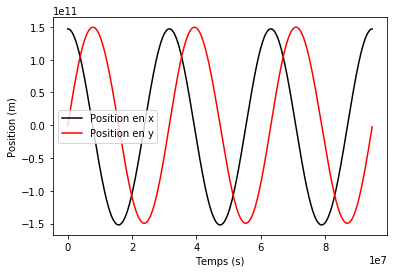

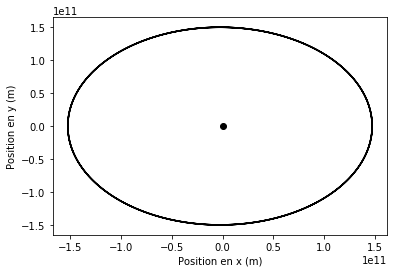

In [8]:
v_int = v + 0.5*h*f(r,v)[1] #initialization of v(t+1/2h)
v_2 = v + h*f(r,v)[1] #definition of velocity v(t+1/2(2h)) for error calculation
r_2 = [0, 0] 

for t in tpoints:
    append_all(r,v)
    r_2 = r.copy()
    v_2 = v.copy()
    r += h*v_int #r(t+h)
    k = h*f(r,v)[1] #k
    v = v_int + 0.5*k #v(t+h)
    v_int += k #v(t+3/2h)
    v_2 += k #v(t+3h)
    r_2 += 2*h*v_2 #r(v2)

#Plot of x position and y position in function of time
plt.plot(tpoints, x_points, color = "k", label = "Position en x")
plt.plot(tpoints, y_points, color = "r", label = "Position en y")
plt.xlabel("Temps (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

#Plot of x position in function of y position
plt.plot(x_points, y_points, "k")
plt.plot(0,0,"ko")
plt.xlabel("Position en x (m)")
plt.ylabel("Position en y (m)")
plt.show()

Le premier graphique présente la position en x et la position en y de la terre par rapport au soleil en fonction du temps. On constate trois orbites (3 périodes) pour un temps de 3 ans ce qui était attendu. Le second graphique présente la position de la terre sur le plan (x,y). Les trois orbites sont présentes dans cette figure, mais sont superposées. Il est à noter aussi que l'orbite est presque circulaire (la forme de la figure la fait sembler plus ovale)

### e.
Les mêmes fonctions sont utilisées pour calculer l'énergie cinétique et potentielle de la terre. On rajoute simplement ces deux calculs à la boucle. On commence par définir la masse de la terre ainsi que des listes vides pour les deux énergies

In [9]:
m = M_earth.value #Earth Mass
Ke = [] #Kinetic Energy List
U = [] #Potential Energy List

r = array([x_0, y_0], float)  #array containing x and y position
v = array([vx_0, vy_0], float) #array containing x and y velocity

x_points = []
y_points = []
vx_points = []
vy_points = []

On exécute ensuite le même code que précédemment en ajoutant le calcule de l'énergie cinétique et de l'énergie potentielle à chaque itération. Deux graphiques sont ensuite faits. Le premier présente l'énergie cinétique, l'énergie potentielle ainsi que l'énergie totale (la somme des deux) en fonction du temps. Le deuxième graphique présente l'énergie totale seule.

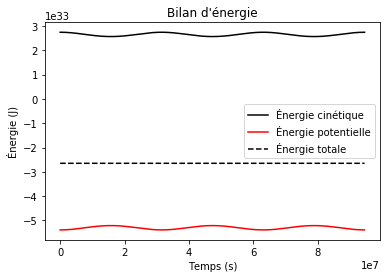

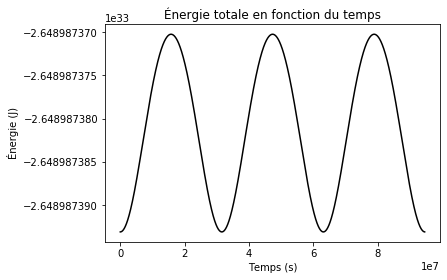

In [10]:
v_int = v + 0.5*h*f(r,v)[1] #initialization of v(t+1/2h)

for t in tpoints:
    append_all(r,v)
    Ke += [0.5 * m * (v[0] ** 2 + v[1] ** 2)] # Kinectic Energy (J)
    U += [-GM*m/r_func(r[0], r[1])] # Potential Energy (J)
    r += h*v_int #r(t+h)
    k = h*f(r,v)[1] #k
    v = v_int + 0.5*k #v(t+h)
    v_int += k #v(t+3/2h)

#Changing energy list into arrays to sum them
Ke = array(Ke)
U = array(U)
E_tot = Ke+U #Total energy (sum of potential and kinetic energy) (J)
    
plt.plot(tpoints, Ke, "k", label = "Énergie cinétique")
plt.plot(tpoints, U, "r", label = "Énergie potentielle")
plt.plot(tpoints, E_tot, "k--", label = "Énergie totale")
plt.xlabel("Temps (s)")
plt.ylabel("Énergie (J)")
plt.legend()
plt.title("Bilan d'énergie")
plt.show()

#Plot of E_tot alone
plt.plot(tpoints, E_tot, "k")
plt.xlabel("Temps (s)")
plt.ylabel("Énergie (J)")
plt.ticklabel_format(useOffset=False)
plt.title("Énergie totale en fonction du temps")
plt.show()

On constate du premier graphique que les énergies potentielles et cinétiques oscillent au courant d'une orbite, mais que l'énergie totale semble constante c'est ce qui est était attendu. On constate de la deuxième figure que l'énergie totale oscille très légèrement (voir axe y) lors d'une orbite. L'énergie totale revient cependant toujours à la même valeur. Cela était attendu puisque la méthode de Verlet conserve l'énergie.

### f.

Pour cette partie les fonctions f et append_all sont redéfinis de nouveau afin que le vecteur r contienne les positions ainsi que les vitesses. Cela facilite les étapes suivantes. Les conditions initiales utilisées sont les mêmes qu'en d et e et n'ont donc pas besoin d'être défini de nouveau.

In [11]:
def f(r):
    x = r[0]
    y = r[1]
    v_x = r[2]
    v_y= r[3]
    radius = r_func(x,y)
    fx = v_x
    fv_x = -GM*x/radius**3
    fy = v_y
    fv_y = -GM*y/radius**3
    
    return array([fx, fy, fv_x, fv_y], float)

def append_all(r):
    x_points.append(r[0])
    y_points.append(r[1])
    vx_points.append(r[2])
    vy_points.append(r[3])

L'array r doit être redéfini afin de concorder avec la définition des fonctions f(r,t) et append_all. Les listes contenant les positions et vitesses sont aussi vidées. Les valeurs obtenues avec la méthode de Verlet sont conservées afin de pouvoir les comparer avec les méthodes suivantes.

In [12]:
r = array([x_0, y_0, vx_0, vy_0])

x_verlet, y_verlet = x_points, y_points
x2_verlet, y2_verlet = x2_points, y2_points
Ke_verlet, U_verlet = Ke, U
x_points = []
y_points = []
vx_points = []
vy_points = []
Ke = []
U = []

On utilise maintenant la méthode RK2 afin de calculer nos données de position de vitesse et d'énergie. Un graphique comparant l'énergie totale obtenue avec la méthode RK2 puis la méthode de Verlet est fait.

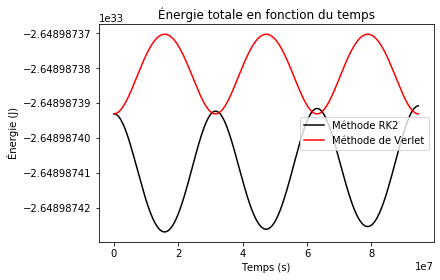

In [13]:
for t in tpoints:
    append_all(r)
    Ke += [0.5 * m * (r[2] ** 2 + r[3] ** 2)] # Kinectic Energy (J)
    U += [-GM*m/r_func(r[0], r[1])] # Potential Energy (J)
    k1 = h*f(r)
    k2 = h*f(r + 0.5*k1)
    r += k2
    
#Changing energy list into arrays to sum them
Ke = array(Ke)
U = array(U)
E_tot = Ke+U #Total energy (sum of potential and kinetic energy) (J)
E_verlet = Ke_verlet + U_verlet

#Plotting total energy for Verlet method and RK2 method
plt.plot(tpoints, E_tot, color = "k", label = "Méthode RK2")
plt.plot(tpoints, E_verlet, color = "r", label = "Méthode de Verlet")
plt.xlabel("Temps (s)")
plt.ylabel("Énergie (J)")
plt.legend()
plt.ticklabel_format(useOffset=False)
plt.title("Énergie totale en fonction du temps")
plt.show()

On constate que l'énergie totale pour la méthode de Verlet est constante. Comme expliqué précédemment, cela était attendu puisque la méthode de Verlet conserve l'énergie. On constate pour la méhotde RK2 que l'énergie n'est pas conservée d'une orbite à l'autre. On constate cependant que l'aire sous la courbe est constante ce qui témoigne du caractère symplectique de la méthode RK2. 

### g.

Pour cette méthode on commence par définir un step size (pas) H ainsi qu'une précision delta. Une pas d'une semaine et une précision de 1 km par année sont utilisés. Le vecteur r est aussi réinitialisé avec les conditions limites. Les listes contenant les positions est vitesses sont aussi réinitialisés.

In [14]:
H = 604800 #1 week in seconds
delta = 3.1709792e-5 #1 km/year in m/s
tpoints = arange(a,b,H) 
r = array([x_0, y_0, vx_0, vy_0], float)  # array containing x,y positions and vx,vy velocities

x_points = []
y_points = []
vx_points = []
vy_points = []
error_list = []

On applique ensuite la méthode de Bulirsch-Stoer afin de calculer la position et la vitesse de la terre autour du soleil. La méthode utilisé est prise du livre Compuational Physics de Newman [1]

In [15]:
for t in tpoints: 
    append_all(r)
    
    # Do one modified mipoint step of size H 
    # to get things started 
    n = 1 
    r1 = r + 0.5*H*f(r) 
    r2 = r + H*f(r1) 
    # The array R1 stores the first row of the 
    # extrapolation table, which contains only the single 
    # modified midpoint estimate of the solution at the 
    # end of the interval 
    R1 = empty([1,4] ,float) 
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2)) 
# Now increase n until the required accuracy is reached 
    error = 2*H*delta 
    while error>H*delta: 
        n += 1 
        h = H/n 
        # Modified midpoint method 
        r1 = r + 0.5*h*f(r) 
        r2 = r + h*f(r1) 
        for i in range(n-1): 
            r1 += h*f(r2) 
            r2 += h*f (r1) 
        # Calculate extrapolation estimates. Arrays R1 and R2 
        # hold the two most recent lines of the table 
        R2 = R1     
        R1 = empty([n,4] ,float) 
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2)) 
        for m in range(1,n): 
            epsilon= (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1) 
            R1[m] = R1[m-1] + epsilon 
        error= abs(epsilon[0]) 
    error_list += [error] #Accumulating error in a list to get total error
    # Set r equal to the most accurate estimate we have, 
    # before moving on to the next big step 
    r = R1[n-1] 

On finit par calculer l'erreur pour la méthode de Verlet puis la comparer à l'erreur pour la méthode de Bulirsch-Stoer. Les graphiques de positions x et y en fonction du temps ainsi que de la position de la terre dans le plan x,y sont aussi affichés.

Bulirsch-Stoer error : 318.0412159903226 m
Verlet error : 80.48023325029342 km


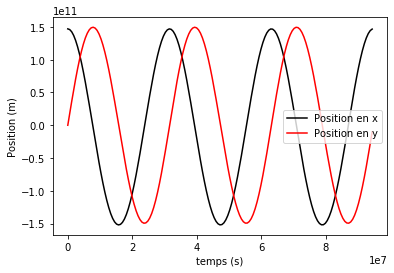

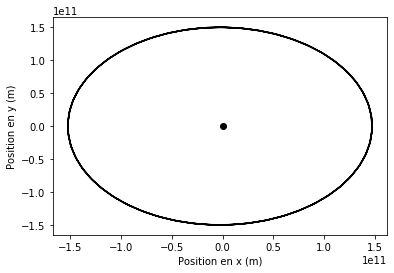

In [16]:
error_BS = sum(error_list)/3 #calculating total error for current method

#Calculating Verlet method error 
for i in range(2, len(x_verlet)):
    err_x = ((x_verlet[i]-x2_verlet[i-1])/6)
    err_y = ((y_verlet[i]-y2_verlet[i-1])/6)
    error += [r_func(err_x, err_y)]

error_verlet = (sum(error)/3)/1000

#printing errors
print("Bulirsch-Stoer error : " + str(error_BS) + " m")
print(("Verlet error : " + str(error_verlet) + " km"))

plt.plot(tpoints, x_points, color = "k", label = "Position en x")
plt.plot(tpoints, y_points, color = "r", label = "Position en y")
plt.xlabel("temps (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

#Plot of x position in function of y position
plt.plot(x_points, y_points, "k")
plt.plot(0,0,"ko")
plt.xlabel("Position en x (m)")
plt.ylabel("Position en y (m)")
plt.show()

On constate que les résultats de position obtenus sont les mêmes que pour la méthode de Verlet. On constate cependant que l'erreur calculée est beaucoup plus petite avec cette méthode. En effet l'erreur obtenue pour la méthode de Bulirsch-Stoer est d'environ 300 m tandis que celle pour la méthode de Verlet est d'environ 80 km (soit plus de 250 fois plus grande). Le temps de calcul nécessaire est environ le même. On en conclut donc que la méthode de Bulirsch-Stoer est plus efficace pour le calcul d'équations différentielles ordinaires de second degré.

# Partie 3: Mars
### h.
Commençons par poser les constantes du problème, soit les positions et les vélocités de la date de lancement et la date d'atterrissage (pour comparer plus tard) venant d'une éphéméride de la planète Mars. Nous décomposons donc les données de date de lancement en x, y et z pour poser les conditions initiales du problème. (Les arrays de position et de vitesse sont transposés afin d'être sur une ligne horizontale plutôt qu'une colonne verticale, facilitant la gestion des données)

In [17]:
eph = Ephemeris(de421) 

# dates
lancement=Time("2020-07-30")
atterissage=Time("2021-02-18")

# un nombre de jours juliens est attendu par la routine, d'ou le .jd position en km, vitesse en km par jour
position, velocity = eph.position_and_velocity('mars',lancement.jd)
p = transpose(position)
v = transpose(velocity)

#Definition of intial values for all variables
x_0 = p[0,0]*1000 #intial x position (m)
y_0 = p[0,1]*1000 #inital y position (m)
z_0 = p[0,2]*1000#initial z position (m)
vx_0 = v[0,0]*1000/86400 #initial x velocity (m/s)
vy_0 = v[0,1]*1000/86400 #intial y velocity (m/s)
vz_0 = v[0,2]*1000/86400#initial z velocity (m/s)

Maintenant les fonctions essentielles sont posées: les arrays des points sont remise à zéro, l'équation du rayon de la position r de Mars en fonction des coordonnées x, y et z, l'équation de la gravité en fonction du rayon de position r et les constantes de taille de pas.

In [18]:
x_points = []
y_points = []
z_points = []
vx_points = []
vy_points = []
vz_points = []


a = 0 #intial time (s)
b = 86400*203 #final time (s) (203 days)
N = 100000 #step size
H = (b-a)/N 
delta = 3.1709792e-5 #conversion of km/year into m/s

def r_func(x,y,z):
    return sqrt(x**2 + y**2 + z**2)

def f(r):
    x = r[0]
    y = r[1]
    z = r[2]
    v_x = r[3]
    v_y= r[4]
    v_z = r[5]
    radius = r_func(x,y,z)
    fx = v_x
    fv_x = -GM*x/radius**3
    fy = v_y
    fv_y = -GM*y/radius**3
    fz = v_z
    fv_z = -GM*z/radius**3
    return array([fx, fy, fz, fv_x, fv_y, fv_z], float)

tpoints = arange(a,b,H) 
r = array([x_0, y_0, z_0, vx_0, vy_0, vz_0], float)  #array containing positions and velocities
# Do the "big steps" of size H 

La méthode Bulirsch-Stoer est ensuite utilisée pour calculer la position de mars en fonction du temps sur les 203 jours entre le lancement et l'atterrissage pour en imprimer les positions et le graphique (x en bleu, y en vert et z en orange). Le positionnement de référence de l'éphéméride est aussi imprimé pour comparer avec les positions calculées.

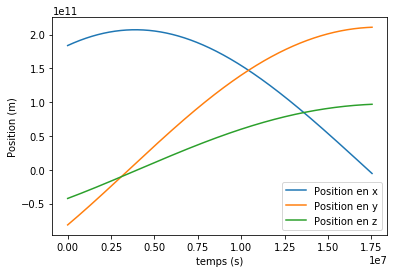

Position en x: -5473204513.144693 m 
Position en y: 210811870477.77356 m 
Position en z: 96861499317.2531 m
[[-1.94538523e+09]
 [ 2.14280417e+11]
 [ 9.83090643e+10]] [m]


In [19]:
for t in tpoints: 
    x_points.append(r[0])
    y_points.append(r[1])
    z_points.append(r[2])
    # Do one modified mipoint step of size H 
    # to get things started 
    n = 1 
    r1 = r + 0.5*H*f(r) 
    r2 = r + H*f(r1) 
    # The array R1 stores the first row of the 
    # extrapolation table, which contains only the single 
    # modified midpoint estimate of the solution at the 
    # end of the interval 
    R1 = empty([1,6], float) 
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2)) 
# Now increase n until the required accuracy is reached 
    error = 2*H*delta 
    while error>H*delta: 
        n += 1 
        h = H/n 
        # Modified midpoint method 
        r1 = r + 0.5*h*f(r) 
        r2 = r + h*f(r1) 
        for i in range(n-1): 
            r1 += h*f(r2) 
            r2 += h*f (r1) 
        # Calculate extrapolation estimates. Arrays R1 and R2 
        # hold the two most recent lines of the table 
        R2 = R1     
        R1 = empty([n,6], float) 
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2)) 
        for m in range(1,n): 
            epsilon= (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1) 
            R1[m] = R1[m-1] + epsilon 
        error= abs(epsilon[0]) 
    # Set r equal to the most accurate estimate we have, 
    # before moving on to the next big step 
    r = R1[n-1] 
# Plot the results 
plt.plot(tpoints,x_points,label = "Position en x")
plt.plot(tpoints,y_points,label = "Position en y")
plt.plot(tpoints,z_points,label = "Position en z")
plt.xlabel("temps (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()
print('Position en x:',x_points[-1],'m', '\nPosition en y:', y_points[-1],'m','\nPosition en z:', z_points[-1],'m')
print(eph.position('mars',atterissage.jd)*1000,'[m]')

On peut voir plus haut que les positions finales calculées sont assez fidèles à celles de l'éphéméride en y et en z, mais l'axe x est assez loin de la position théorique. Ceci pourrait tout simplement être expliqué par la perturbation gravitationnelle qui est causée par la gravité des autres astres près de Mars. Cet effet devrait aussi être observé sur les autres axes, mais, comme on peut le voir sur le graphique, c'est sur l'axe des x que la planète Mars s'éloigne le plus du Soleil. Ainsi, la gravité du Soleil devient moins forte sur elle et les forces gravitationnelles des autres planètes deviennent moins négligeables sur la trajectoire de Mars. Donc, notre position est aussi loin de la position théorique tout simplement parce que la méthode utilisée dans cette simulation ne prend en compte que la force d'attraction du Soleil sur Mars et néglige la gravité entre Mars et les objets massique qui l'entoure.

# Références

[1] M. E. Newman, Computational Physics. CreateSpace, 2013.

[2] https://en.wikipedia.org/wiki/Jet_Propulsion_Laboratory_Development_Ephemeris